In [98]:
import pandas as pd
import numpy as np

In [99]:
file = r"C:\Users\Aaditya Gupta\Downloads\HPC_BOOST-main\test\Matrix_Mult.log"

In [100]:

with open(file) as f:
    f = f.readlines()


In [172]:
"asd".isnumeric()

False

In [173]:
def splitL(l,events):
    e = l[0].split("|")
    # for i in e:
    #     events[i]=[]
    for i in range(1,len(l)):
        val=l[i].split(" ")
        print("HRERERE",val)
        if(val[0].isnumeric()):
            events[e[0]].append(val[1])
            events[e[1]].append(val[2])
            events[e[2]].append(val[3])
            count = 3
            # print(len(val))
            for v in range(4,len(val)-3,4):
                print("Exists",e[count])
                if(e[count] not in events):
                        print("Doesnt exist", e[count])
                        events[e[count]]=[]
                events[e[count]].append(val[v:v+4])
                count+=1
    # print(count)
    return events

In [176]:
def main(f):
    s=""
    for i in f:
        s+=i
    l = s.split("GID|")
    # print(l)
    for i in range(1,len(l)):
        e = l[i].split("\n")
        # print("HERE",e)
        events={}
        eve = e[0].split("|")
        # print("HERE2", eve)
        for j in range(len(eve)):
            events[eve[j]]=[]
    print(events)
    for i in range(1,len(l)):
        l_1_1 = l[i].split("\n")
        print("HERE2")
        events=splitL(l_1_1,events)
        # print(len(events))
    return events

In [ ]:
p=main(f)

In [185]:
print(list(p.keys()))

['EventCount', 'CpuCount', 'Total runtime [s]', 'TEMP_CORE', 'PWR_PKG_ENERGY', 'PWR_PP0_ENERGY', 'PWR_PP1_ENERGY', 'PWR_DRAM_ENERGY', 'PWR_PLATFORM_ENERGY', 'UNCORE_CLOCK', 'PP0_TEMP', 'PP1_TEMP', 'IO_REQUESTS', 'DRAM_READS', 'DRAM_WRITES', 'VOLTAGE_CORE', 'APERF', 'MPERF', 'PPERF', 'FRONTEND_RETIRED_LATENCY_GE_128', 'FRONTEND_RETIRED_LATENCY_GE_256', 'FRONTEND_RETIRED_LATENCY_GE_512', 'FRONTEND_RETIRED_LATENCY_GE_2_BUBBLES_GE_1', 'INSTR_RETIRED_ANY', 'CPU_CLK_UNHALTED_CORE', 'CPU_CLK_UNHALTED_REF', 'ICACHE_16B_IFDATA_STALL', 'ICACHE_64B_IFTAG_HIT', 'ICACHE_64B_IFTAG_MISS', 'ICACHE_64B_IFTAG_ALL', 'CACHE_LOOKUP_M', 'TRK_OCCUPANCY_ALL', 'TRK_REQUESTS_ALL', 'ICACHE_64B_IFTAG_STALL', 'CPU_CLOCK_UNHALTED_THREAD_P', 'CPU_CLOCK_UNHALTED_THREAD_P_ANY', 'CPU_CLOCK_UNHALTED_REF_XCLK', 'CACHE_LOOKUP_EXTSNP_FILTER', 'COH_TRK_OCCUPANCY', 'TRK_REQUESTS_WRITES', 'CPU_CLOCK_UNHALTED_REF_XCLK_ANY', 'CPU_CLOCK_UNHALTED_ONE_THREAD_ACTIVE', 'CPU_CLOCK_UNHALTED_TOTAL_CYCLES', 'BACLEARS_ANY', 'CACHE_LOOKUP

In [192]:
min_len = len(p['TEMP_CORE'])
max_len = len(p['TEMP_CORE'])
maxkey="TEMP_CORE"
minkey="TEMP_CORE"
lenkey=[]

for key in p:
    lenkey.append(len(p[key]))
    if key not in ['EventCount', 'CpuCount', 'Total runtime [s]']:
        if len(p[key]) < min_len:
            min_len = len(p[key])
            minkey = key
        if len(p[key]) > max_len:
            max_len = len(p[key])
            maxkey = key
print(min_len,max_len, minkey,"   ", maxkey)


11 1602 DSB2MITE_SWITCHES_PENALTY_CYCLES     TEMP_CORE


In [197]:
{i:lenkey.count(i) for i in set(lenkey)}


{11: 8,
 12: 21,
 13: 22,
 14: 28,
 15: 44,
 16: 64,
 17: 42,
 18: 36,
 19: 36,
 20: 32,
 21: 20,
 22: 8,
 23: 4,
 24: 8,
 25: 4,
 28: 4,
 60: 1,
 1602: 22,
 66: 1,
 72: 2,
 78: 2,
 102: 1}

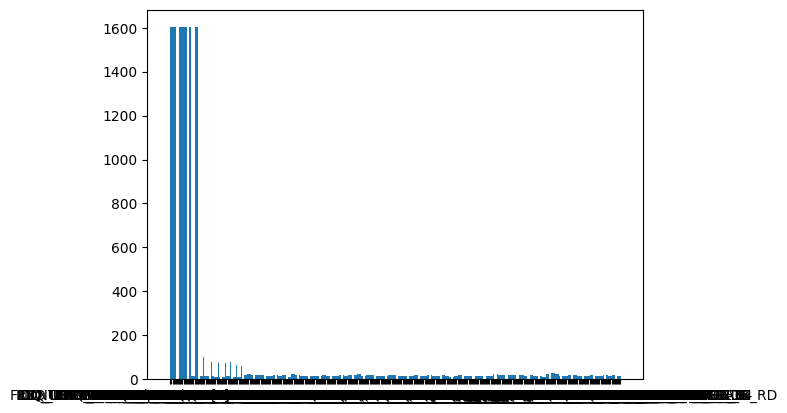

In [195]:
import matplotlib.pyplot as plt
from matplotlib.axis import Axis 
import matplotlib.pyplot as plt  
import numpy as np  

plt.bar(list(p.keys()), lenkey) 

plt.show() 

In [198]:
p_truncated = p.copy()
for key in p:
    p_truncated[key] = p[key][:11]

In [ ]:
for key in p_truncated:
    print(len(p_truncated[key]))

In [ ]:
c=pd.DataFrame(p_truncated)


In [202]:
c.head()

,EventCount,CpuCount,Total runtime [s],TEMP_CORE,PWR_PKG_ENERGY,PWR_PP0_ENERGY,PWR_PP1_ENERGY,PWR_DRAM_ENERGY,PWR_PLATFORM_ENERGY,UNCORE_CLOCK,...,LSD_UOPS_CYCLES_2,LSD_UOPS_CYCLES_3,LSD_UOPS_CYCLES_4,LSD_UOPS_CYCLES_ACTIVE,LSD_UOPS_CYCLES_INACTIVE,OTHER_ASSISTS_ANY,FRONTEND_RETIRED_LATENCY_GE_8,FRONTEND_RETIRED_LATENCY_GE_16,FRONTEND_RETIRED_LATENCY_GE_32,FRONTEND_RETIRED_LATENCY_GE_64
0,31,4,2.2016709379129e-05,"[40.0, 39.0, 40.0, 39.0]","[0.00787353515625, 0.0, 0.0, 0.0]","[0.00494384765625, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.00030517578125, 0.0, 0.0, 0.0]","[0.00018310546875, 0.0, 0.0, 0.0]","[1839492.0, 0.0, 0.0, 0.0]",...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[44391.0, 770998.0, 6184000.0, 6947542.0]","[7.0, 0.0, 0.0, 0.0]","[14.0, 23.0, 20.0, 292.0]","[14.0, 23.0, 20.0, 292.0]","[14.0, 23.0, 20.0, 292.0]","[14.0, 23.0, 20.0, 292.0]"
1,31,4,0.012489584724942,"[40.0, 38.0, 40.0, 38.0]","[0.05029296875, 0.0, 0.0, 0.0]","[0.02783203125, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0068359375, 0.0, 0.0, 0.0]","[0.00091552734375, 0.0, 0.0, 0.0]","[12852886.0, 0.0, 0.0, 0.0]",...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[9876618.0, 8042261.0, 34417498.0, 4954875.0]","[1.0, 0.0, 0.0, 0.0]","[141.0, 625.0, 328.0, 1244.0]","[141.0, 625.0, 328.0, 1244.0]","[141.0, 625.0, 328.0, 1244.0]","[141.0, 625.0, 328.0, 1244.0]"
2,31,4,0.036624877033973,"[40.0, 38.0, 40.0, 38.0]","[0.1005859375, 0.0, 0.0, 0.0]","[0.04327392578125, 0.0, 0.0, 0.0]","[0.0123291015625, 0.0, 0.0, 0.0]","[0.018798828125, 0.0, 0.0, 0.0]","[0.00146484375, 0.0, 0.0, 0.0]","[15700699.0, 0.0, 0.0, 0.0]",...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[24026416.0, 2397771.0, 30168923.0, 7256544.0]","[2.0, 0.0, 0.0, 0.0]","[80.0, 1322.0, 132.0, 397.0]","[80.0, 1322.0, 132.0, 397.0]","[80.0, 1322.0, 132.0, 397.0]","[80.0, 1322.0, 132.0, 397.0]"
3,31,4,0.052144386554647,"[40.0, 39.0, 40.0, 39.0]","[0.05255126953125, 0.0, 0.0, 0.0]","[0.02752685546875, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.00531005859375, 0.0, 0.0, 0.0]","[0.00103759765625, 0.0, 0.0, 0.0]","[16259682.0, 0.0, 0.0, 0.0]",...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[25913061.0, 392896.0, 29657860.0, 1378308.0]","[0.0, 0.0, 0.0, 0.0]","[26.0, 4316.0, 111.0, 181.0]","[26.0, 4316.0, 111.0, 181.0]","[26.0, 4316.0, 111.0, 181.0]","[26.0, 4316.0, 111.0, 181.0]"
4,31,4,0.067748791872616,"[39.0, 39.0, 39.0, 39.0]","[0.05364990234375, 0.0, 0.0, 0.0]","[0.025390625, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.00555419921875, 0.0, 0.0, 0.0]","[0.00115966796875, 0.0, 0.0, 0.0]","[16380162.0, 0.0, 0.0, 0.0]",...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[29922913.0, 1171488.0, 32425438.0, 1924152.0]","[0.0, 0.0, 0.0, 0.0]","[38.0, 3322.0, 535.0, 1640.0]","[38.0, 3322.0, 535.0, 1640.0]","[38.0, 3322.0, 535.0, 1640.0]","[38.0, 3322.0, 535.0, 1640.0]"


In [93]:
l[1]

'EventCount|CpuCount|Total runtime [s]|TEMP_CORE|PWR_PKG_ENERGY|PWR_PP0_ENERGY|PWR_PP1_ENERGY|PWR_DRAM_ENERGY|PWR_PLATFORM_ENERGY|UNCORE_CLOCK|PP0_TEMP|PP1_TEMP|IO_REQUESTS|DRAM_READS|DRAM_WRITES|VOLTAGE_CORE|APERF|MPERF|PPERF|ICACHE_16B_IFDATA_STALL|ICACHE_64B_IFTAG_HIT|ICACHE_64B_IFTAG_MISS|ICACHE_64B_IFTAG_ALL|CACHE_LOOKUP_M|CACHE_LOOKUP_M|CACHE_LOOKUP_M|CACHE_LOOKUP_M|CACHE_LOOKUP_M|CACHE_LOOKUP_M|TRK_OCCUPANCY_ALL|TRK_REQUESTS_ALL|INSTR_RETIRED_ANY|CPU_CLK_UNHALTED_CORE|CPU_CLK_UNHALTED_REF\n1 31 4 2.2016709379129e-05 40.0 39.0 40.0 39.0 0.00787353515625 0.0 0.0 0.0 0.00494384765625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00030517578125 0.0 0.0 0.0 0.00018310546875 0.0 0.0 0.0 1839492.0 0.0 0.0 0.0 43.0 0.0 0.0 0.0 41.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 22086.0 0.0 0.0 0.0 3353.0 0.0 0.0 0.0 0.6922607421875 0.69384765625 0.693359375 0.6929931640625 1264646.0 1716738.0 2120258.0 6213950.0 2744184.0 3675944.0 4323468.0 12934290.0 1355783.0 1666108.0 2041784.0 5966746.0 815.0 4913.0 19160.0 45900.0 

In [94]:
l_1_1 = l[1].split("\n")

In [95]:
l[1]

'EventCount|CpuCount|Total runtime [s]|TEMP_CORE|PWR_PKG_ENERGY|PWR_PP0_ENERGY|PWR_PP1_ENERGY|PWR_DRAM_ENERGY|PWR_PLATFORM_ENERGY|UNCORE_CLOCK|PP0_TEMP|PP1_TEMP|IO_REQUESTS|DRAM_READS|DRAM_WRITES|VOLTAGE_CORE|APERF|MPERF|PPERF|ICACHE_16B_IFDATA_STALL|ICACHE_64B_IFTAG_HIT|ICACHE_64B_IFTAG_MISS|ICACHE_64B_IFTAG_ALL|CACHE_LOOKUP_M|CACHE_LOOKUP_M|CACHE_LOOKUP_M|CACHE_LOOKUP_M|CACHE_LOOKUP_M|CACHE_LOOKUP_M|TRK_OCCUPANCY_ALL|TRK_REQUESTS_ALL|INSTR_RETIRED_ANY|CPU_CLK_UNHALTED_CORE|CPU_CLK_UNHALTED_REF\n1 31 4 2.2016709379129e-05 40.0 39.0 40.0 39.0 0.00787353515625 0.0 0.0 0.0 0.00494384765625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00030517578125 0.0 0.0 0.0 0.00018310546875 0.0 0.0 0.0 1839492.0 0.0 0.0 0.0 43.0 0.0 0.0 0.0 41.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 22086.0 0.0 0.0 0.0 3353.0 0.0 0.0 0.0 0.6922607421875 0.69384765625 0.693359375 0.6929931640625 1264646.0 1716738.0 2120258.0 6213950.0 2744184.0 3675944.0 4323468.0 12934290.0 1355783.0 1666108.0 2041784.0 5966746.0 815.0 4913.0 19160.0 45900.0 

In [96]:
l_1_1

['EventCount|CpuCount|Total runtime [s]|TEMP_CORE|PWR_PKG_ENERGY|PWR_PP0_ENERGY|PWR_PP1_ENERGY|PWR_DRAM_ENERGY|PWR_PLATFORM_ENERGY|UNCORE_CLOCK|PP0_TEMP|PP1_TEMP|IO_REQUESTS|DRAM_READS|DRAM_WRITES|VOLTAGE_CORE|APERF|MPERF|PPERF|ICACHE_16B_IFDATA_STALL|ICACHE_64B_IFTAG_HIT|ICACHE_64B_IFTAG_MISS|ICACHE_64B_IFTAG_ALL|CACHE_LOOKUP_M|CACHE_LOOKUP_M|CACHE_LOOKUP_M|CACHE_LOOKUP_M|CACHE_LOOKUP_M|CACHE_LOOKUP_M|TRK_OCCUPANCY_ALL|TRK_REQUESTS_ALL|INSTR_RETIRED_ANY|CPU_CLK_UNHALTED_CORE|CPU_CLK_UNHALTED_REF',
 '1 31 4 2.2016709379129e-05 40.0 39.0 40.0 39.0 0.00787353515625 0.0 0.0 0.0 0.00494384765625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00030517578125 0.0 0.0 0.0 0.00018310546875 0.0 0.0 0.0 1839492.0 0.0 0.0 0.0 43.0 0.0 0.0 0.0 41.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 22086.0 0.0 0.0 0.0 3353.0 0.0 0.0 0.0 0.6922607421875 0.69384765625 0.693359375 0.6929931640625 1264646.0 1716738.0 2120258.0 6213950.0 2744184.0 3675944.0 4323468.0 12934290.0 1355783.0 1666108.0 2041784.0 5966746.0 815.0 4913.0 19160.0 4590

In [97]:
len(l_1_1[1].split(" "))

128

In [64]:
part = splitL(l_1_1)

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
142
34


In [65]:
part

{'EventCount': ['31',
  '31',
  '31',
  '31',
  '31',
  '31',
  '31',
  '31',
  '31',
  '31',
  '31',
  '31',
  '31',
  '31',
  '31',
  '31',
  '31'],
 'CpuCount': ['4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4',
  '4'],
 'Total runtime [s]': ['2.2016709379129e-05',
  '0.012489584724942',
  '0.036624877033973',
  '0.052144386554647',
  '0.067748791872616',
  '0.079667751666003',
  '0.089688528919761',
  '0.09971078142055',
  '0.10973348018271',
  '0.11974341586981',
  '0.12975383779226',
  '0.1397641556445',
  '0.14977333079196',
  '0.15978663153098',
  '0.16979995880446',
  '0.17981516451091',
  '0.18985825724517'],
 'TEMP_CORE': [['40.0', '39.0', '40.0', '39.0'],
  ['40.0', '38.0', '40.0', '38.0'],
  ['40.0', '38.0', '40.0', '38.0'],
  ['40.0', '39.0', '40.0', '39.0'],
  ['39.0', '39.0', '39.0', '39.0'],
  ['38.0', '39.0', '39.0', '39.0'],
  ['39.0', '40.0', '39.0', '41.0'],
  ['39.0', '42.0', '40.0', '42.0'],
  ['40.0', '

In [36]:
print(len(l_1_1[0].split("|")[1:]))

34


In [34]:
print(len(l_1_1[3].split(" ")[1:]))

127


In [7]:
import csv

with open(file) as file:
    lines = file.read().splitlines()
    lines = [lines[x:x+3] for x in range(0, len(lines), 3)]

    with open('yourcsv.csv', 'w+') as csvfile:
        w = csv.writer(csvfile)
        w.writerows(lines)

In [14]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(open(file))
with open(file):
    soup = BeautifulSoup(file.read())

TypeError: expected str, bytes or os.PathLike object, not TextIOWrapper